<a href="https://colab.research.google.com/github/MrAsmodeo/Ciclo3_Repository/blob/main/Taller_final_de_ingenier%C3%ADa_computacional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Preprocesamiento


In [108]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Cargar los datos
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data"
column_names = ['Class', 'Left-Weight', 'Left-Distance', 'Right-Weight', 'Right-Distance']
data = pd.read_csv(url, names=column_names)

# Separar los atributos y la variable objetivo
X = data.drop('Class', axis=1)
y = data['Class']

# Normalización
normalizer = MinMaxScaler()
X_normalized = normalizer.fit_transform(X)

# Estandarización
standardizer = StandardScaler()
X_standardized = standardizer.fit_transform(X)

# Verificar los resultados
print("Datos normalizados:")
print(X_normalized[:5])

print("\nDatos estandarizados:")
print(X_standardized[:5])


Datos normalizados:
[[0.   0.   0.   0.  ]
 [0.   0.   0.   0.25]
 [0.   0.   0.   0.5 ]
 [0.   0.   0.   0.75]
 [0.   0.   0.   1.  ]]

Datos estandarizados:
[[-1.41421356 -1.41421356 -1.41421356 -1.41421356]
 [-1.41421356 -1.41421356 -1.41421356 -0.70710678]
 [-1.41421356 -1.41421356 -1.41421356  0.        ]
 [-1.41421356 -1.41421356 -1.41421356  0.70710678]
 [-1.41421356 -1.41421356 -1.41421356  1.41421356]]


Redes Neuronales (MLP):

In [57]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Cargar los datos
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data"
column_names = ['Class', 'Left-Weight', 'Left-Distance', 'Right-Weight', 'Right-Distance']
data = pd.read_csv(url, names=column_names)

# Separar los atributos y la variable objetivo
X = data.drop('Class', axis=1)
y = data['Class']
# Establecer la semilla fija para reproducibilidad
np.random.seed(8)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Definir los parámetros para la búsqueda de hiperparámetros
hidden_layer_sizes = [(1, 2, 3), (4, 5, 6)]
activation = ['identity', 'logistic', 'tanh', 'relu']
solver = ['sgd', 'adam']
alpha = [0.0001, 0.05]
learning_rate = ['constant', 'adaptive']

# Realizar la búsqueda de hiperparámetros y evaluar el desempeño
best_accuracy = 0.0
best_model = None

for hl_sizes in hidden_layer_sizes:
    for act in activation:
        for sol in solver:
            for a in alpha:
                for lr in learning_rate:
                    # Crear el clasificador MLP con los parámetros actuales
                    mlp = MLPClassifier(hidden_layer_sizes=hl_sizes, activation=act, solver=sol, alpha=a, learning_rate=lr)
                    
                    # Entrenar el modelo
                    mlp.fit(X_train, y_train)
                    
                    # Predecir las etiquetas para el conjunto de prueba
                    y_pred = mlp.predict(X_test)
                    
                    # Calcular la exactitud y compararla con el mejor resultado hasta ahora
                    accuracy = accuracy_score(y_test, y_pred)
                    if accuracy > best_accuracy:
                        best_accuracy = accuracy
                        best_model = mlp
                        
# Imprimir el mejor modelo y su exactitud
print("Mejor modelo de MLP:")
print(best_model)
print("Exactitud del mejor modelo:", best_accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Mejor modelo de MLP:
MLPClassifier(activation='tanh', hidden_layer_sizes=(4, 5, 6),
              learning_rate='adaptive')
Exactitud del mejor modelo: 0.912


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [61]:
#Primero cargamos las librerias necesarias 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
#Importing MLPClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#Descargamos y cargamos nuestra base de datos de 'https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data'
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data'
df = pd.read_csv(url, header=None)
df


,0,1,2,3,4
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5
...,...,...,...,...,...
620,L,5,5,5,1
621,L,5,5,5,2
622,L,5,5,5,3
623,L,5,5,5,4


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MPL
0.928 %
Matriz de confusión:
[[ 0  2  3]
 [ 0 51  3]
 [ 0  1 65]]


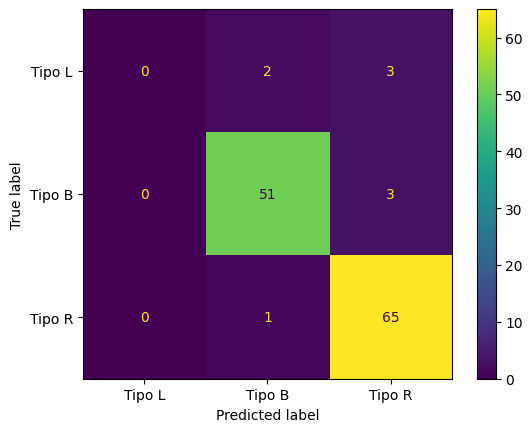

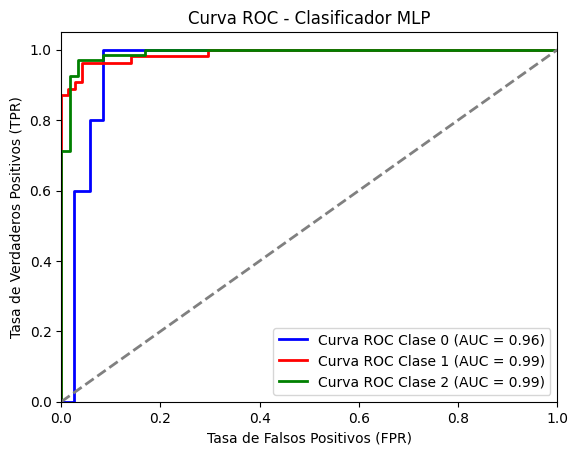

AUC promedio: 0.98


In [66]:
### Preprocesamiento###
#Devidimo los datos en caracteristicas y etiquetas 
# Codificar las etiquetas en valores numéricos
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Dividir los datos en características (X) y etiquetas/clases (y)
#X = df.iloc[:, 1:5]
#y = df.iloc[:, 0]
X = data.drop("Class", axis=1)
y = data["Class"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2)

###Preprocesamiento - Normalizacion

# Normalización del conjunto de entrenamiento
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)

# Aplicar la misma transformación al conjunto de prueba
X_test_normalized = scaler.transform(X_test)

##Preprocesamiento - Estandarización:

# Estandarización del conjunto de entrenamiento
scaler = MinMaxScaler()
X_train_standardized = scaler.fit_transform(X_train)

# Aplicar la misma transformación al conjunto de prueba
X_test_standardized = scaler.transform(X_test)

# Establecer la semilla fija para reproducibilidad
np.random.seed(8)

#Initializing the MLPClassifier
classifier = MLPClassifier(activation='tanh', alpha=0.05, hidden_layer_sizes=(4, 5, 6),learning_rate='adaptive')

classifier.fit(X_train, y_train)
#Predicción sobre las instancias de prueba
y_pred = classifier.predict(X_test)
## See how the model performs on the test data.
print("MPL")
print(classifier.score(X_test, y_test),"%")

cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Tipo L","Tipo B","Tipo R"])
disp.plot()

y_pred_proba = classifier.predict_proba(X_test)

# Calcular la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(confusion)

# Calcular la curva ROC y el AUC
n_classes = len(le.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcular el promedio del AUC para todas las clases
mean_auc = sum(roc_auc.values()) / n_classes

# Graficar la curva ROC para todas las clases
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Curva ROC Clase {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Clasificador MLP')
plt.legend(loc="lower right")
plt.show()
# Imprimir el promedio del AUC
print("AUC promedio: {:.2f}".format(mean_auc))

K Vecinos Más Cercanos (KNN):

In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data'
df = pd.read_csv(url, header=None)

X = df.iloc[:, 1:5]
y = df.iloc[:, 0]

np.random.seed(3)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

param_grid = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_accuracy = grid_search.best_score_

print("Mejor modelo de KNN:")
print(best_model)
print("Exactitud del mejor modelo:", best_accuracy)

y_pred = best_model.predict(X_test)
accuracy = best_model.score(X_test, y_test)
print("Exactitud en los datos de prueba:", accuracy)


Mejor modelo de KNN:
KNeighborsClassifier(algorithm='brute', n_neighbors=17, weights='distance')
Exactitud del mejor modelo: 0.9
Exactitud en los datos de prueba: 0.896


KNN
0.896 %


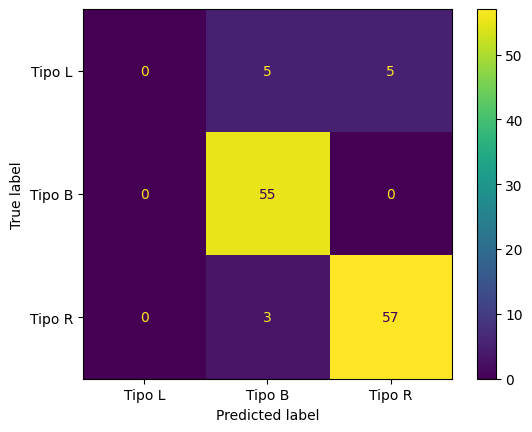

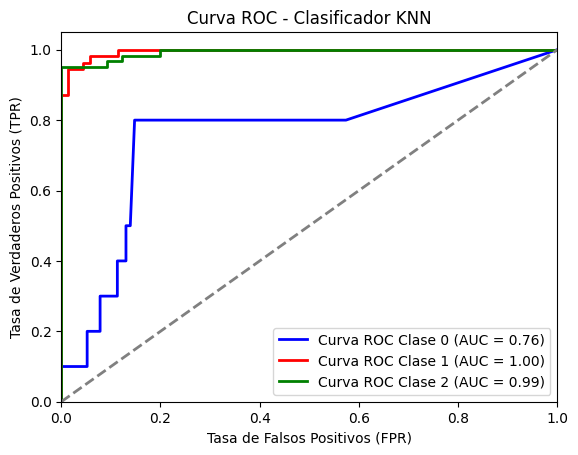

AUC promedio: 0.92


In [92]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data'
df = pd.read_csv(url, header=None)

X = df.iloc[:, 1:5]
y = df.iloc[:, 0]
# Codificar las etiquetas en valores numéricos
le = LabelEncoder()
y_encoded = le.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2)

np.random.seed(3)

classifier = KNeighborsClassifier(algorithm='brute', n_neighbors=17, weights='distance')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
y_pred_proba = classifier.predict_proba(X_test)

print("KNN")
print(classifier.score(X_test, y_test), "%")

cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Tipo L", "Tipo B", "Tipo R"])
disp.plot()

# Calcular la curva ROC y el AUC
n_classes = len(le.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcular el promedio del AUC para todas las clases
mean_auc = sum(roc_auc.values()) / n_classes

# Graficar la curva ROC para todas las clases
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Curva ROC Clase {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Clasificador KNN')
plt.legend(loc="lower right")
plt.show()

# Imprimir el promedio del AUC
print("AUC promedio: {:.2f}".format(mean_auc))

Máquinas de Soporte Vectorial (SVM):

In [94]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Cargar los datos
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data'
df = pd.read_csv(url, header=None)

X = df.iloc[:, 1:5]
y = df.iloc[:, 0]

np.random.seed(3)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Definir los parámetros para la búsqueda de hiperparámetros
C_values = [1.0, 10.0, 100.0, 1000.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
gamma_values = ['scale', 'auto', 0.1, 0.01]

# Realizar la búsqueda de hiperparámetros y evaluar el desempeño
best_accuracy = 0.0
best_model = None

for C in C_values:
    for kernel in kernel_values:
        for gamma in gamma_values:
            # Crear el clasificador SVM con los parámetros actuales
            svm = SVC(C=C, kernel=kernel, gamma=gamma)
            
            # Entrenar el modelo
            svm.fit(X_train, y_train)
            
            # Predecir las etiquetas para el conjunto de prueba
            y_pred = svm.predict(X_test)
            
            # Calcular la exactitud y compararla con el mejor resultado hasta ahora
            accuracy = accuracy_score(y_test, y_pred)
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_model = svm
                        
# Imprimir el mejor modelo y su exactitud
print("Mejor modelo de SVM:")
print(best_model)
print("Exactitud del mejor modelo:", best_accuracy)
print("Kernel utilizado:", best_model.kernel)

Mejor modelo de SVM:
SVC(C=10.0, gamma=0.1, kernel='poly')
Exactitud del mejor modelo: 1.0
Kernel utilizado: poly


SVM
1.0 %


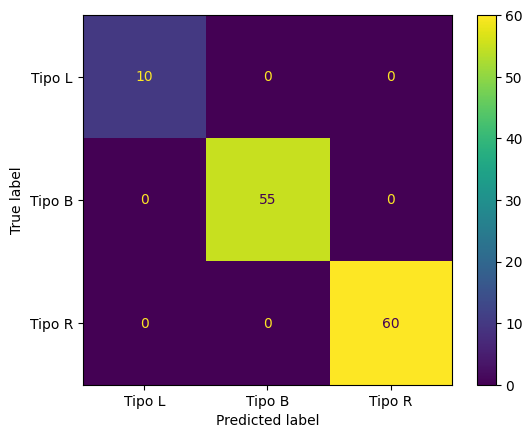

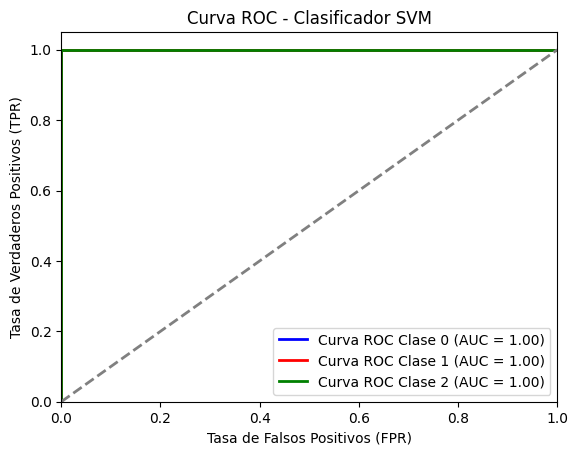

AUC promedio: 1.00


In [98]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data'
df = pd.read_csv(url, header=None)

# Valores dados por nuestro comparador
#######
C = 10.0
gamma = 0.1
kernel = 'poly'
###############

X = df.iloc[:, 1:5]
y = df.iloc[:, 0]

# Codificar las etiquetas en valores numéricos
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2)

np.random.seed(3)

classifier = SVC(C=C, kernel=kernel, gamma=gamma)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
y_pred_proba = classifier.decision_function(X_test)

print("SVM")
print(classifier.score(X_test, y_test), "%")

cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Tipo L", "Tipo B", "Tipo R"])
disp.plot()

# Calcular la curva ROC y el AUC
n_classes = len(le.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcular el promedio del AUC para todas las clases
mean_auc = sum(roc_auc.values()) / n_classes

# Graficar la curva ROC para todas las clases
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Curva ROC Clase {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Clasificador SVM')
plt.legend(loc="lower right")
plt.show()

# Imprimir el promedio del AUC
print("AUC promedio: {:.2f}".format(mean_auc))


Árboles de Decisión:

In [122]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Cargar los datos
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data'
df = pd.read_csv(url, header=None)

X = df.iloc[:, 1:5]
y = df.iloc[:, 0]
np.random.seed(3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Definir los parámetros para el árbol de decisión
criterion = ["gini", "entropy"]
splitter = ["best", "random"]

# Realizar la búsqueda de hiperparámetros y evaluar el desempeño
best_accuracy = 0.0
best_model = None

for crit in criterion:
    for split in splitter:
        # Crear el clasificador de árbol de decisión con los parámetros actuales
        dt = DecisionTreeClassifier(criterion=crit, splitter=split)
        
        # Entrenar el modelo
        dt.fit(X_train, y_train)
        
        # Predecir las etiquetas para el conjunto de prueba
        y_pred = dt.predict(X_test)
        
        # Calcular la exactitud y compararla con el mejor resultado hasta ahora
        accuracy = accuracy_score(y_test, y_pred)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = dt
                        
# Imprimir el mejor modelo y su exactitud
print("Mejor modelo de Árbol de Decisión:")
print(best_model)
print("Exactitud del mejor modelo:", best_accuracy)


Mejor modelo de Árbol de Decisión:
DecisionTreeClassifier(criterion='entropy', splitter='random')
Exactitud del mejor modelo: 0.832


Árbol de Decisión
0.832 %


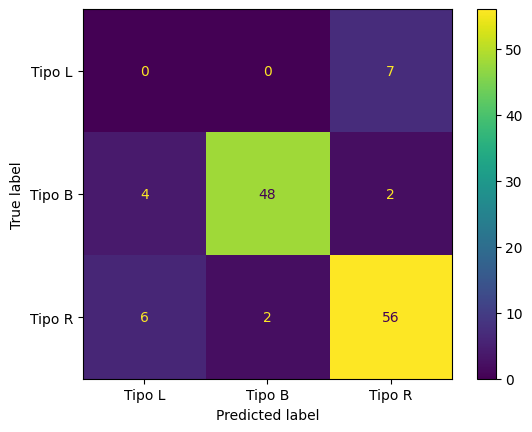

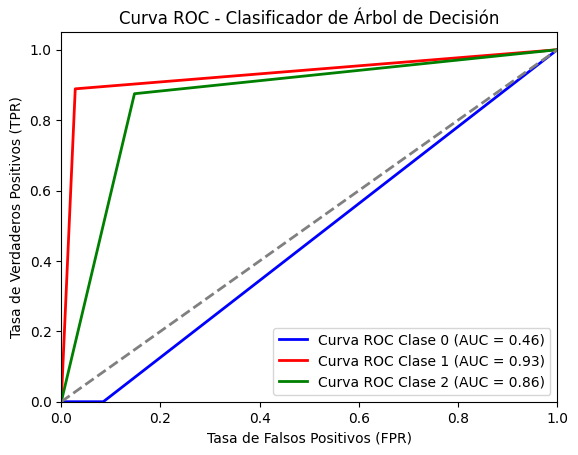

AUC promedio: 0.75


In [179]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data'
df = pd.read_csv(url, header=None)

X = df.iloc[:, 1:5]
y = df.iloc[:, 0]

# Codificar las etiquetas en valores numéricos
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2)

np.random.seed(22)

classifier = DecisionTreeClassifier(criterion='entropy', splitter='random')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
y_pred_proba = classifier.predict_proba(X_test)

print("Árbol de Decisión")
print(classifier.score(X_test, y_test), "%")

cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Tipo L", "Tipo B", "Tipo R"])
disp.plot()

# Calcular la curva ROC y el AUC
n_classes = len(le.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcular el promedio del AUC para todas las clases
mean_auc = sum(roc_auc.values()) / n_classes

# Graficar la curva ROC para todas las clases
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Curva ROC Clase {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Clasificador de Árbol de Decisión')
plt.legend(loc="lower right")
plt.show()

# Imprimir el promedio del AUC
print("AUC promedio: {:.2f}".format(mean_auc))


Naive Bayes:

In [209]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Cargar los datos
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data'
df = pd.read_csv(url, header=None)

X = df.iloc[:, 1:5]
y = df.iloc[:, 0]

np.random.seed(12)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Definir los valores a evaluar para var_smoothing para la hiper parametrización
var_smoothing_values = np.logspace(-10, 0, num=11)

# Crear el clasificador Naive Bayes
nb = GaussianNB()

# Definir los parámetros para la búsqueda en cuadrícula
param_grid = {'var_smoothing': var_smoothing_values}

# Realizar la búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(nb, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Obtener el mejor valor para var_smoothing
best_var_smoothing = grid_search.best_params_['var_smoothing']

# Entrenar el modelo con el mejor valor de var_smoothing
nb_best = GaussianNB(var_smoothing=best_var_smoothing)
nb_best.fit(X_train, y_train)

# Predecir las etiquetas para el conjunto de prueba
y_pred = nb_best.predict(X_test)

# Calcular la exactitud del modelo
accuracy = accuracy_score(y_test, y_pred)

# Imprimir el mejor valor de var_smoothing y la exactitud del modelo
print("Mejor valor de var_smoothing:", best_var_smoothing)
print("Exactitud del modelo Naive Bayes:", accuracy)


Mejor valor de var_smoothing: 1e-10
Exactitud del modelo Naive Bayes: 0.952


Naive Bayes
0.952 %


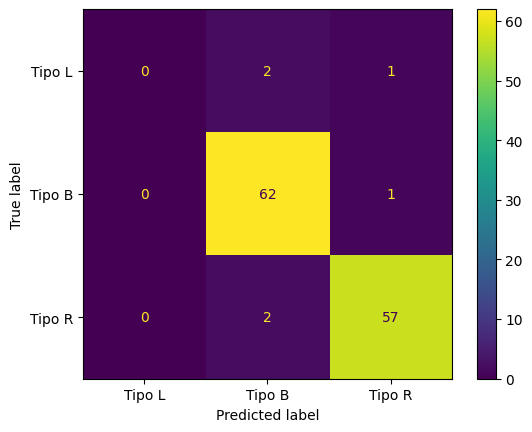

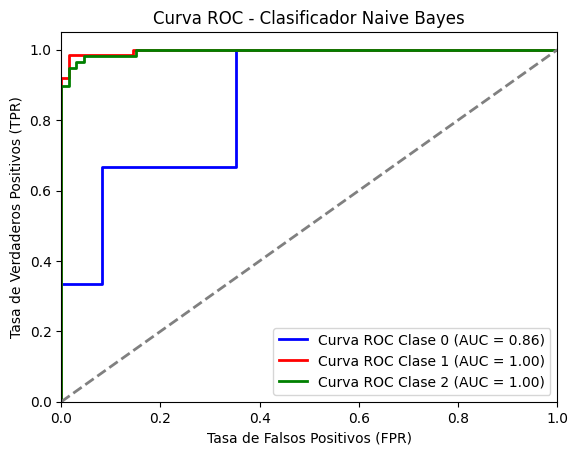

AUC promedio: 0.95


In [212]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data'
df = pd.read_csv(url, header=None)

X = df.iloc[:, 1:5]
y = df.iloc[:, 0]

# Codificar las etiquetas en valores numéricos
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2)

np.random.seed(12)

classifier = GaussianNB(priors=None, var_smoothing=1e-10)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
y_pred_proba = classifier.predict_proba(X_test)

print("Naive Bayes")
print(classifier.score(X_test, y_test), "%")

cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Tipo L", "Tipo B", "Tipo R"])
disp.plot()

# Calcular la curva ROC y el AUC
n_classes = len(le.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcular el promedio del AUC para todas las clases
mean_auc = sum(roc_auc.values()) / n_classes

# Graficar la curva ROC para todas las clases
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Curva ROC Clase {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Clasificador Naive Bayes')
plt.legend(loc="lower right")
plt.show()

# Imprimir el promedio del AUC
print("AUC promedio: {:.2f}".format(mean_auc))


Preprocesamiento

SVM
0.936 %


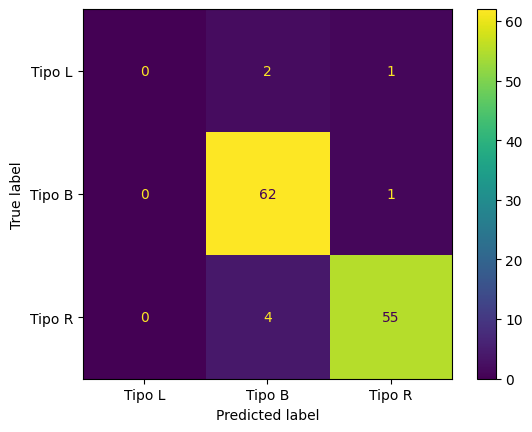

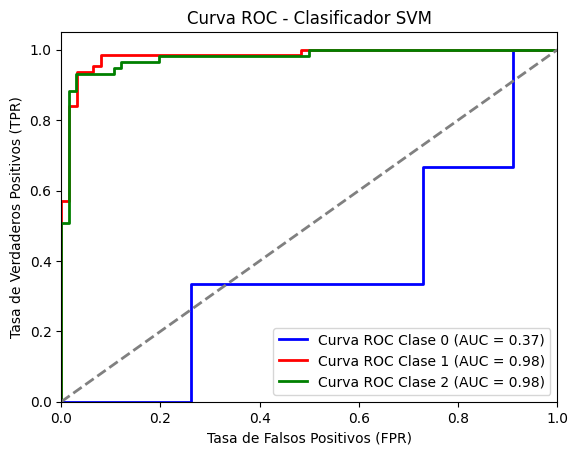

AUC promedio: 0.77


In [293]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler, LabelEncoder

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data'
df = pd.read_csv(url, header=None)

# Valores dados por nuestro comparador
#######
C = 10.0
gamma = 0.1
kernel = 'poly'
###############

X = df.iloc[:, 1:5]
y = df.iloc[:, 0]

# Codificar las etiquetas en valores numéricos
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2)

np.random.seed(12)

# Aplicar la normalización de los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

classifier = SVC(C=C, kernel=kernel, gamma=gamma)
classifier.fit(X_train_scaled, y_train)

y_pred = classifier.predict(X_test_scaled)
y_pred_proba = classifier.decision_function(X_test_scaled)

print("SVM")
print(classifier.score(X_test_scaled, y_test), "%")

cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Tipo L", "Tipo B", "Tipo R"])
disp.plot()

# Calcular la curva ROC y el AUC
n_classes = len(le.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcular el promedio del AUC para todas las clases
mean_auc = sum(roc_auc.values()) / n_classes

# Graficar la curva ROC para todas las clases
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Curva ROC Clase {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Clasificador SVM')
plt.legend(loc="lower right")
plt.show()

# Imprimir el promedio del AUC
print("AUC promedio: {:.2f}".format(mean_auc))

SVM
0.944 %


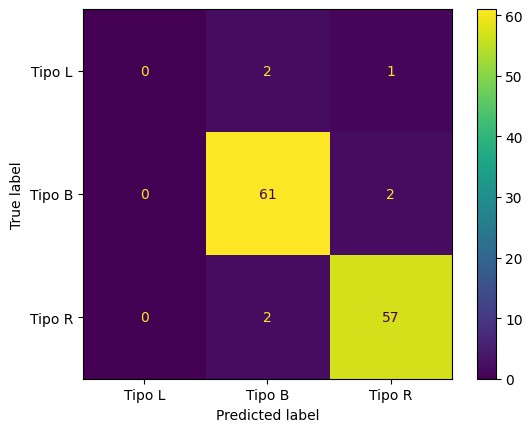

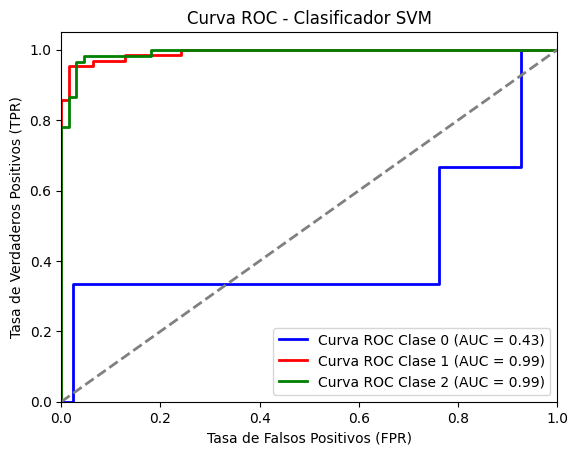

AUC promedio: 0.80


In [294]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data'
df = pd.read_csv(url, header=None)

# Valores dados por nuestro comparador
#######
C = 10.0
gamma = 0.1
kernel = 'poly'
###############

X = df.iloc[:, 1:5]
y = df.iloc[:, 0]

# Codificar las etiquetas en valores numéricos
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2)

np.random.seed(3)

# Aplicar la normalización de los datos
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

classifier = SVC(C=C, kernel=kernel, gamma=gamma)
classifier.fit(X_train_normalized, y_train)

y_pred = classifier.predict(X_test_normalized)
y_pred_proba = classifier.decision_function(X_test_normalized)

print("SVM")
print(classifier.score(X_test_normalized, y_test), "%")

cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Tipo L", "Tipo B", "Tipo R"])
disp.plot()

# Calcular la curva ROC y el AUC
n_classes = len(le.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcular el promedio del AUC para todas las clases
mean_auc = sum(roc_auc.values()) / n_classes

# Graficar la curva ROC para todas las clases
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Curva ROC Clase {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Clasificador SVM')
plt.legend(loc="lower right")
plt.show()

# Imprimir el promedio del AUC
print("AUC promedio: {:.2f}".format(mean_auc))
